# Carregamento dos dados

In [63]:
import os
import random
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array, load_img

## Mapas e diretório onde os arquivos estao localizados

In [64]:
LABELS = ["Inferno", "Mirage", "Train", "Vertigo"]
DIR = "backend/model/data/Mapas"

## Preparação das imagens para o treinamento

In [65]:
def image_prep(dir, labels, size=(100, 100)):
    data = []
    for mapa in labels:
        path = f"{dir}\\{mapa}"
        index = labels.index(mapa)

        for image_name in os.listdir(path):
            img_path = f'{path}/{image_name}'
            img_loaded = load_img(img_path, color_mode="rgb",
                                  target_size=size)
            img_arr = img_to_array(img_loaded)
            data.append([img_arr, index])
    return data


path = os.getcwd()
dir_maps = path + '\\data\\Mapas' 
data = image_prep(dir_maps, LABELS)

## Aleatorização da base de dados

In [66]:
# Funções mais recentes do tensorflow fazem isso por si só
random.seed(3705)
random.shuffle(data)
for amostra in data[:10]:
    print(amostra[1])

3
0
2
3
2
1
3
2
1
2


In [67]:
# Conversão dos dados para numpy array
def sep_Xy(data):
    X = []
    y = []
    for feature, label in data:
        X.append(feature)
        y.append(label)
    X = np.array(X)
    y = np.array(y)
    return (X, y)

X, y = sep_Xy(data)
X = X/255.0

# Treinamento do Modelo

In [68]:
from tensorflow.keras import callbacks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Rescaling, RandomFlip, RandomRotation, RandomZoom
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam

## Data augmentation

In [69]:
data_augmentation = Sequential([
    RandomFlip("horizontal"),
    RandomRotation(0.1),
    RandomZoom(.2, .2)
])

In [70]:
model = Sequential([
    data_augmentation
    ]
)

## Camadas convulucionais

In [71]:
model.add(Conv2D(16, (3, 3),
                 activation='relu',
                 input_shape=X.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(16, (3, 3),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(16, (3, 3),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

## Camada da tranformação

In [72]:
model.add(Flatten())

## Camada de Output

In [73]:
model.add(Dense(len(LABELS), activation='softmax'))

## Compilação do Modelo

In [74]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

## Treinamento e salvamento

In [75]:
# Salva o modelo na epoch de menor val_accuracy
callbacks = [
    ModelCheckpoint(
        filepath="model.h5",
        monitor="val_accuracy",
        save_best_only=True)
]

model.fit(X, y,
          batch_size=24, epochs=25,
          validation_split=0.1,
          callbacks=callbacks)

Epoch 1/25
43/43 [==============================] - 5s 89ms/step - loss: 1.3528 - accuracy: 0.3189 - val_loss: 1.2716 - val_accuracy: 0.4513
Epoch 2/25
43/43 [==============================] - 4s 84ms/step - loss: 1.2149 - accuracy: 0.4225 - val_loss: 1.1132 - val_accuracy: 0.4779
Epoch 3/25
43/43 [==============================] - 3s 74ms/step - loss: 1.0657 - accuracy: 0.5311 - val_loss: 1.0840 - val_accuracy: 0.4602
Epoch 4/25
43/43 [==============================] - 3s 73ms/step - loss: 1.0452 - accuracy: 0.5410 - val_loss: 1.0436 - val_accuracy: 0.4956
Epoch 5/25
43/43 [==============================] - 4s 83ms/step - loss: 0.9737 - accuracy: 0.5972 - val_loss: 0.9909 - val_accuracy: 0.5664
Epoch 6/25
43/43 [==============================] - 3s 71ms/step - loss: 0.9188 - accuracy: 0.6180 - val_loss: 0.9821 - val_accuracy: 0.5398
Epoch 7/25
43/43 [==============================] - 3s 72ms/step - loss: 0.8965 - accuracy: 0.6140 - val_loss: 0.9096 - val_accuracy: 0.6283
Epoch 8/25
43

## Gráfico ilustrativo do modelo

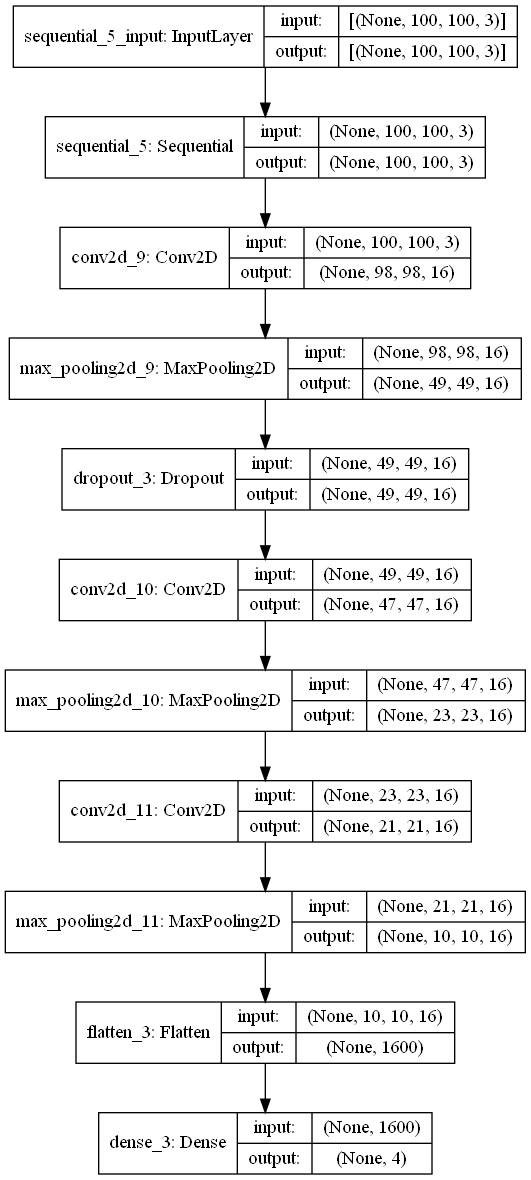

In [76]:
plot_model(model, show_shapes=True, to_file="model.png")

# Previsão unitária

In [77]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
import tensorflow as tf

In [78]:
def prepare(filepath):
    IMG_SIZE = 100
    img = load_img(filepath,
                   color_mode="rgb",
                   target_size=(IMG_SIZE, IMG_SIZE))
    img_array = img_to_array(img) / 255.0
    img_array = tf.expand_dims(img_array, 0)
    return img_array

In [79]:
model = load_model("model.h5")

In [87]:
imagem = prepare(f"{path}\\data\\inferno(243).png")

prediction = model.predict(imagem)[0]
prediction = prediction*100
prediction = [round(prob, 2) for prob in prediction]

In [88]:
Resultado = {LABELS[prob]: prediction[prob] for prob in range(len(prediction))}

print(Resultado)

{'Inferno': 90.01, 'Mirage': 0.0, 'Train': 0.0, 'Vertigo': 9.99}
